---
<span style="font-size: 20px;">**Φόρτωση δεδομένων**</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import sem, t, pearsonr, ttest_ind


# Φόρτωση του CSV αρχείου
df_csv = pd.read_csv("Cell_Phones_meta.csv")

# Φόρτωση του JSON αρχείου
df_json = pd.read_json("Cell_Phones_and_Accessories_5.json", lines=True)

print(df_csv)
print(df_csv.columns)
print("--------")
print(df_json)
print(df_json.columns)

                                               category tech1  \
0     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
1     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
2     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
3     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
4     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                 ...   ...   
8325  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8326  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8327  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8328  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8329  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                            description  fit  \
0     ['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...  NaN   
1     ['Standard package: 1 x original phone 1 x Qua...  NaN   
2     ['Dark Blue OEM facep

**Εδώ φορτώνουμε όλα μας τα δεδομένα από τα 2 αρχεία που μας δίνονται *(.csv, .json).***</br>
**Επίσης κάνουμε όλα τα απαραίτητα *import* που θα χρειαστούμε παρακάτω στον κώδικα.**</br>
<span style="font-size: 12px;">*Δεν θα χρειαστεί να ξανα γίνουν τα import ή να ξανα φορτωθούν τα δεδεομένα για κανένα από τα παρακάτω υποερωτήματα*</span>

---
<span style="font-size: 25px;">**Α**</span>

In [3]:
# αφαιρεί τα ίδια 'reviewerID' για την περίπτωση που κάποιος μπορεί να έκανε στο ίδιο προιόν παραπάνω από 1 σχόλια
def remove_duplicates_within_group(group):
    return group[~group.duplicated()]

df_no_duplicat_reviewerID = df_json.groupby('asin')['reviewerID'].apply(remove_duplicates_within_group)

df_review_counts = pd.DataFrame({
    'asin': df_no_duplicat_reviewerID.index.get_level_values(0).unique(),
    'review_count': df_no_duplicat_reviewerID.groupby(level=0).count().values
})
print(df_review_counts)
    
df_review_count = df_json.groupby('asin')['reviewerID'].count().reset_index()
df_review_count.columns = ['asin', 'review_count']
print(df_review_count)

             asin  review_count
0      7508492919            66
1      7532385086            14
2      7887421268            16
3      8199900164             5
4      8288853439            19
...           ...           ...
48181  B01HJBS5C2            18
48182  B01HJC7N4C             7
48183  B01HJCN1UC            30
48184  B01HJCN55I            14
48185  B01HJH9IN6            10

[48186 rows x 2 columns]
             asin  review_count
0      7508492919            66
1      7532385086            14
2      7887421268            16
3      8199900164             5
4      8288853439            19
...           ...           ...
48181  B01HJBS5C2            18
48182  B01HJC7N4C             7
48183  B01HJCN1UC            30
48184  B01HJCN55I            14
48185  B01HJH9IN6            10

[48186 rows x 2 columns]


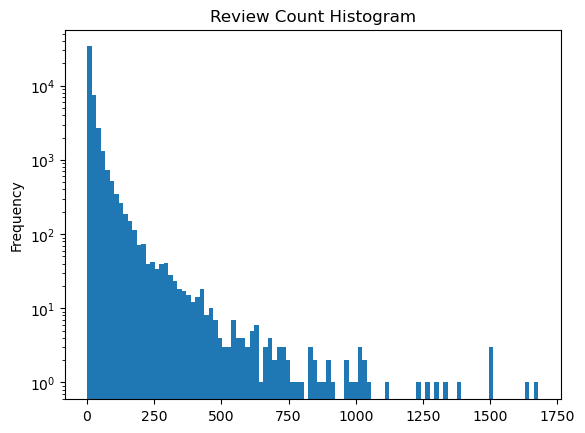

In [4]:
#1 Ιστόγραμμα του review count με 100 κάδους
df_review_counts['review_count'].plot(kind='hist', bins=100, log=True, title='Review Count Histogram')
plt.show()

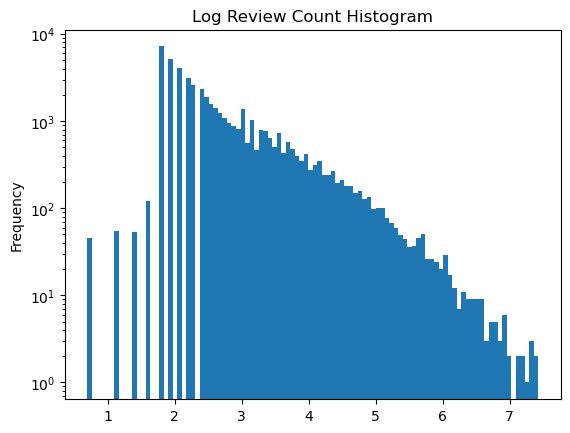

In [5]:
#2 Ιστόγραμμα του λογαρίθμου του review count με 100 κάδους
np.log1p(df_review_counts['review_count']).plot(kind='hist', bins=100, log=True, title='Log Review Count Histogram')
plt.show()

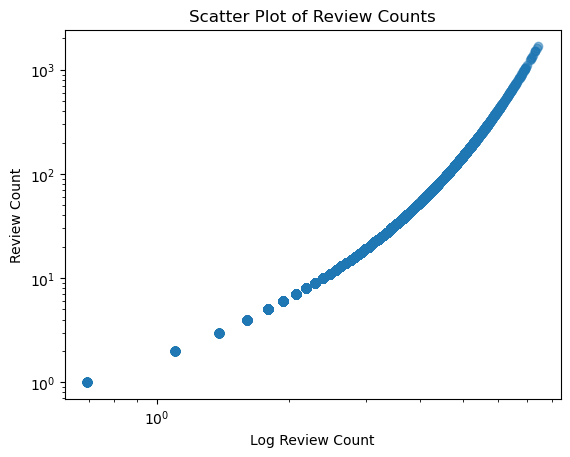

In [6]:
#3 Scatter plot των review counts και την συχνότητα τους σε λογαριθμική κλίμακα
plt.scatter(np.log1p(df_review_counts['review_count']), df_review_counts['review_count'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Review Counts')
plt.xlabel('Log Review Count')
plt.ylabel('Review Count')
plt.show()

             asin  review_count
0      7508492919            66
1      7532385086            14
2      7887421268            16
3      8199900164             5
4      8288853439            19
...           ...           ...
48181  B01HJBS5C2            18
48182  B01HJC7N4C             7
48183  B01HJCN1UC            30
48184  B01HJCN55I            14
48185  B01HJH9IN6            10

[48186 rows x 2 columns]
     review_count  asin_count
0               1          45
1               2          55
2               3          54
3               4         122
4               5        7188
..            ...         ...
478          1497           1
479          1501           1
480          1510           1
481          1631           1
482          1678           1

[483 rows x 2 columns]


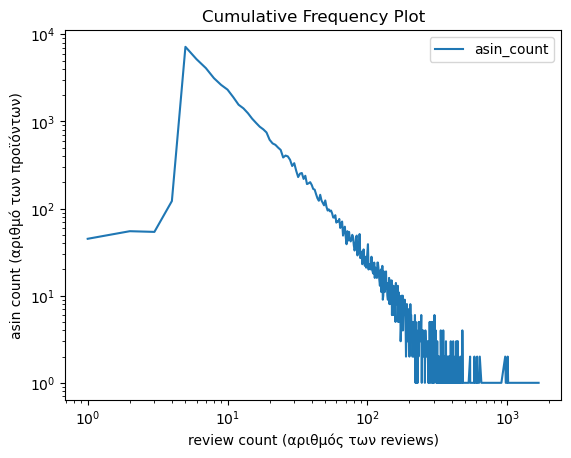

In [7]:
#4 Cumulative frequency vector
print(df_review_counts)

empty_df = pd.DataFrame()

empty_df = df_review_counts.groupby('review_count')
print(empty_df)

grouped_df = df_review_counts.groupby('review_count')

# Displaying the groups
#for group_name, group_data in grouped_df:
#    print(f"Group: {group_name}")
#    print(group_data)
#    print()

group_counts = grouped_df['asin'].count().reset_index(name='asin_count')
print(group_counts)

#df_review_counts['cumulative_freq'] = df_review_counts['review_count'].rank(ascending=False, method='max')
#df_review_counts['cumulative_freq'] = df_review_counts['cumulative_freq'].astype(int)
#print(df_review_counts)

#cumulative_freq_df = df_review_counts.groupby('review_count')['cumulative_freq'].min().reset_index()
#print(cumulative_freq_df)

#cumulative_freq_df.plot(x='review_count', y='cumulative_freq', logx=True, logy=True, title='Cumulative Frequency Plot')

group_counts.plot(x='review_count', y='asin_count', logx=True, logy=True, title='Cumulative Frequency Plot')
plt.xlabel('review count (αριθμός των reviews)')
plt.ylabel('asin count (αριθμό των προϊόντων)')
plt.show()

Έχουμε τόσα προϊόντα που έχουν x reviews <span style="font-size: smaller;">*(ώπου x έναν αριθμό από το 1 έως το 1678 - αλλά το x δεν έχει συνεχόμενες τιμές)*</span>.</br>
***π.χ. Έχουμε 7.188 προϊόντα που έχουν 5 reviews***

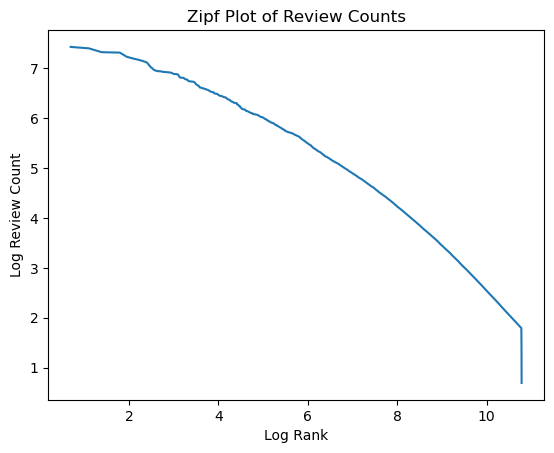

In [8]:
#5 Zipf plot της κατανομής των review_counts
df_review_counts = df_review_counts.sort_values(by='review_count', ascending=False)
df_review_counts['rank'] = df_review_counts['review_count'].rank(ascending=False, method='max')
plt.plot(np.log1p(df_review_counts['rank']), np.log1p(df_review_counts['review_count']))
plt.title('Zipf Plot of Review Counts')
plt.xlabel('Log Rank')
plt.ylabel('Log Review Count')
plt.show()

---
<span style="font-size: 25px;">**B**</span>

In [9]:
# Έλεγχος για το αν έχουμε NaN τιμές στην στήλη 'unixReviewTime'
print(df_json['unixReviewTime'].isna().any())

# Έλεγχος για το αν έχουμε NaN τιμές στην στήλη 'asin'
print(df_json['asin'].isna().any())

False
False


In [10]:
# Μετατροπή του unixReviewTime σε DateTime object
print(df_json['unixReviewTime'])
df_json['unixReviewTime'] = pd.to_datetime(df_json['unixReviewTime'], unit='s')
print(df_json['unixReviewTime'])

0          1407110400
1          1392163200
2          1391817600
3          1391472000
4          1391385600
              ...    
1128432    1482364800
1128433    1468540800
1128434    1468454400
1128435    1468368000
1128436    1494460800
Name: unixReviewTime, Length: 1128437, dtype: int64
0         2014-08-04
1         2014-02-12
2         2014-02-08
3         2014-02-04
4         2014-02-03
             ...    
1128432   2016-12-22
1128433   2016-07-15
1128434   2016-07-14
1128435   2016-07-13
1128436   2017-05-11
Name: unixReviewTime, Length: 1128437, dtype: datetime64[ns]


In [11]:
# Εξαγωγή της ημερομηνίας του πρώτου review για κάθε προϊόν
# Υπολογισμός του αριθμού των μηνών που προστίθενται σε κάθε review
# Παίρνει λίγο χρόνο για να τρέξει ο παρακάτω κώδικας(~0.5 - 1 λεπτό)
df_json_copy = df_json.copy()

# Υπολογισμός του μήνα του κάθε review
df_json_copy['month_since_first'] = (
    df_json_copy.groupby('asin')['unixReviewTime']
    .transform(lambda x: ((x - x.min()).dt.days // 30).astype(int))
)

print(df_json_copy['month_since_first'])

0          24
1          19
2          19
3          18
4          18
           ..
1128432     5
1128433     0
1128434     0
1128435     0
1128436     9
Name: month_since_first, Length: 1128437, dtype: int32


In [12]:
# Υπολογισμός μέσης τιμής του rating για κάθε μήνα
mean_ratings = df_json_copy.groupby('month_since_first')['overall'].mean().reset_index()

print(mean_ratings)

     month_since_first   overall
0                    0  4.256627
1                    1  4.220549
2                    2  4.211156
3                    3  4.221064
4                    4  4.215840
..                 ...       ...
148                167  3.000000
149                170  5.000000
150                175  5.000000
151                176  1.000000
152                179  4.000000

[153 rows x 2 columns]


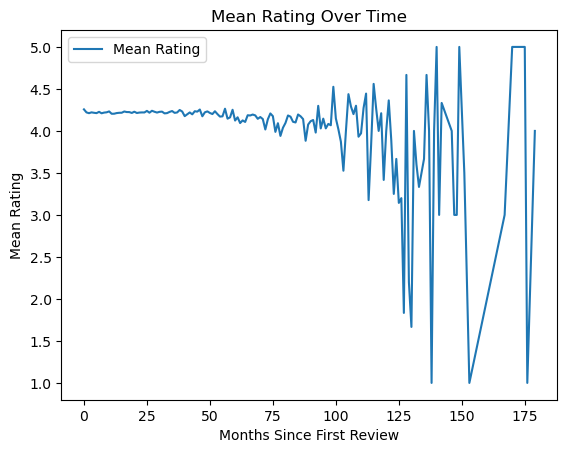

In [13]:
#sns.set(style="darkgrid")
sns.lineplot(x='month_since_first', y='overall', data=mean_ratings, label='Mean Rating')
plt.title('Mean Rating Over Time')
plt.xlabel('Months Since First Review')
plt.ylabel('Mean Rating')
plt.legend()
plt.show()

Παρατήρηση
---
Παρατηρούμε ότι όσο απομακρινόμαστε από τον μήνα "0" βλέπουμε(ειδικά στο τέλος) ότι η λεπτομέρια του μέσου rating χαλάει. Αυτό είναι λογικό, αφού σημαίνει ότι όσο πιο πολύ περνάει ο καιρός τότε τόσο λιγότεροι θα μπαίνουν να αφήσουν το σχόλιό τους στο αντικείμενο γιατί το αντικείμενο παλιώνει.

In [14]:
# Υπολογισμός 95% confidence interval
confidence_interval = df_json_copy.groupby('month_since_first')['overall'].agg(
    lambda x: t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sem(x)) if len(x) > 1 else [np.nan, np.nan]
).apply(pd.Series).reset_index()

print(confidence_interval)

     month_since_first         0         1
0                    0  4.249876  4.263378
1                    1  4.210978  4.230121
2                    2  4.201206  4.221105
3                    3  4.210829  4.231299
4                    4  4.205282  4.226398
..                 ...       ...       ...
148                167       NaN       NaN
149                170       NaN       NaN
150                175       NaN       NaN
151                176       NaN       NaN
152                179       NaN       NaN

[153 rows x 3 columns]


In [15]:
# Συνδυασμός των μέσων τιμών και του confidence interval σε ένα dataframe
result_df = pd.concat([mean_ratings, confidence_interval[0], confidence_interval[1]], axis=1)
result_df.columns = ['months_since_first', 'mean_rating', 'lower_bound', 'upper_bound']

print(result_df)

     months_since_first  mean_rating  lower_bound  upper_bound
0                     0     4.256627     4.249876     4.263378
1                     1     4.220549     4.210978     4.230121
2                     2     4.211156     4.201206     4.221105
3                     3     4.221064     4.210829     4.231299
4                     4     4.215840     4.205282     4.226398
..                  ...          ...          ...          ...
148                 167     3.000000          NaN          NaN
149                 170     5.000000          NaN          NaN
150                 175     5.000000          NaN          NaN
151                 176     1.000000          NaN          NaN
152                 179     4.000000          NaN          NaN

[153 rows x 4 columns]


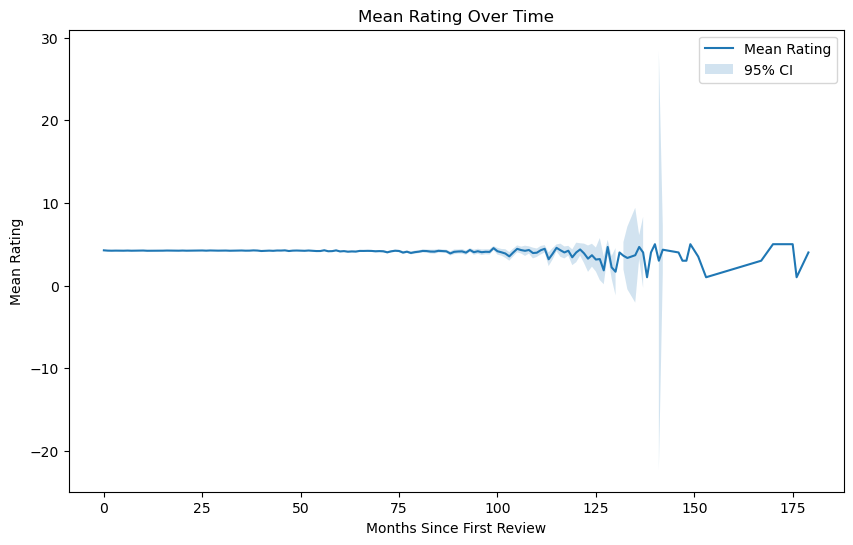

In [16]:
# Γράφημα μέσης τιμής του rating με confidence interval
#sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='months_since_first', y='mean_rating', data=result_df, label='Mean Rating')
plt.fill_between(result_df['months_since_first'], result_df['lower_bound'], result_df['upper_bound'], alpha=0.2, label='95% CI')
plt.title('Mean Rating Over Time')
plt.xlabel('Months Since First Review')
plt.ylabel('Mean Rating')
plt.legend()
plt.show()

***Αυτό είναι ένα κακό διάγραμμα. Έχει τιμές που έχουν θόρυβο αφού είναι εκτός τον ορίο 0-5 (το εύρος των τιμών μιας αξιολόγισης)***

In [17]:
# Κάνουμε prune τα δεδομένα για να περιορίσουμε το confidence interval ανάμεσα στο 0-5(το εύρος των τιμ΄ων μιας αξιολόγισης)
# Βάζουμε NaN τιμές στις γραμμές που δεν ικανοποιούν την παραπάνω συνθήκη
from scipy.stats import zscore

filtered_df = result_df.copy()

filtered_df['lower_bound'] = np.where(
    (filtered_df['lower_bound'] >= 0) & (filtered_df['lower_bound'] <= 5),
    filtered_df['lower_bound'],
    np.nan
)

filtered_df['upper_bound'] = np.where(
    (filtered_df['upper_bound'] >= 0) & (filtered_df['upper_bound'] <= 5),
    filtered_df['upper_bound'],
    np.nan
)

print(filtered_df)

     months_since_first  mean_rating  lower_bound  upper_bound
0                     0     4.256627     4.249876     4.263378
1                     1     4.220549     4.210978     4.230121
2                     2     4.211156     4.201206     4.221105
3                     3     4.221064     4.210829     4.231299
4                     4     4.215840     4.205282     4.226398
..                  ...          ...          ...          ...
148                 167     3.000000          NaN          NaN
149                 170     5.000000          NaN          NaN
150                 175     5.000000          NaN          NaN
151                 176     1.000000          NaN          NaN
152                 179     4.000000          NaN          NaN

[153 rows x 4 columns]


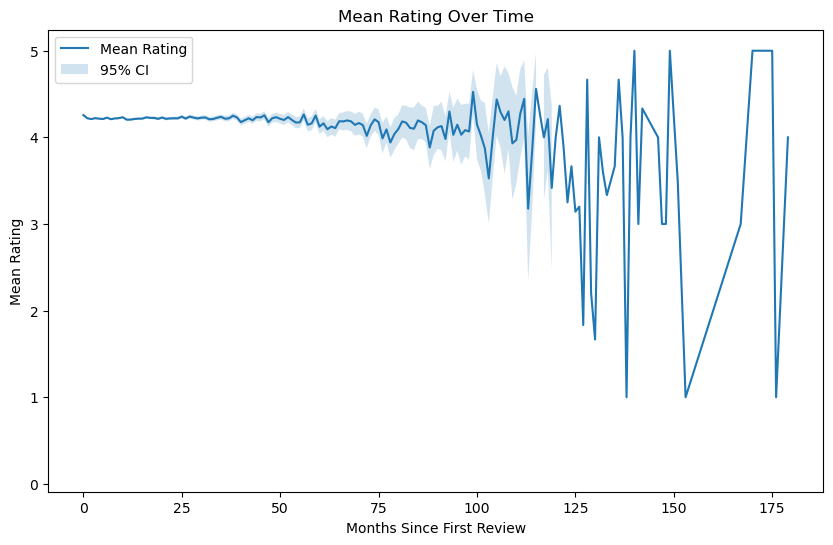

In [18]:
# Γράφημα μέσης τιμής του rating με confidence interval
#sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='months_since_first', y='mean_rating', data=filtered_df, label='Mean Rating')
plt.fill_between(filtered_df['months_since_first'], filtered_df['lower_bound'], filtered_df['upper_bound'], alpha=0.2, label='95% CI')
plt.title('Mean Rating Over Time')
plt.xlabel('Months Since First Review')
plt.ylabel('Mean Rating')
plt.legend()
plt.show()

---
<span style="font-size: 25px;">**Γ**</span>

In [19]:
# Αφαιρούνται οι χαρακτήρες '$' και ',' και γίνονται float αριθμοί
new_df_csv = df_csv.copy()

def clean_price(price):
    try:
        return float(price.replace('$', '').replace(',', ''))
    except:
        return None

new_df_csv['price'] = new_df_csv['price'].apply(clean_price)

#for index, value in new_df_csv.iterrows():
#    print(index, value['price'])
    
#print("--------------------------------------------------")

# Αφαιρούνται οι γραμμές που έχουν NaN τιμές
new_df_csv = new_df_csv.dropna(subset=['price'])

#for index, value in new_df_csv.iterrows():
#    print(index, value['price'], value['asin'])
    
print(new_df_csv)

                                               category tech1  \
7     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
20    ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
82    ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
101   ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
109   ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                 ...   ...   
8305  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8309  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8310  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8312  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8323  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                            description  fit  \
7     ['Compatible with Sprint cell phone service, t...  NaN   
20    ['Compatible with Sprint cell phone service, t...  NaN   
82                         

In [20]:
# checkαρω αν υπάρχει και στο df_json αυτό "8273 1380.0 B01H3Z12SS" που εκτυπώνω από πάνω
print('B01H3Z12SS' in df_json['asin'].values)

# merge τα 2 dataframes
merged_data = pd.merge(new_df_csv, df_json, on="asin", how="inner")
print(merged_data)
print(merged_data['price'])
print(merged_data['asin'])
print(merged_data.columns)
#for index, value in merged_data.iterrows():
#    print(index, value['price'], value['asin'])

False
                                                category tech1  \
0      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
1      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
2      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
3      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
4      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                  ...   ...   
18976  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18977  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18978  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18979  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18980  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                             description  fit  \
0      ['Like new in box great looking phone get it b...  NaN   
1      ['Like new in box great looking phone get it b...  NaN   
2     

In [21]:
merged_data_grouped = merged_data.groupby('asin')
for name, group in merged_data_grouped:
    print(f"Group: {name}")
    #print(group)
    print(group['price'])
    print("\n")
    break

Group: B000FYU4SO
0    17.99
1    17.99
2    17.99
3    17.99
4    17.99
5    17.99
6    17.99
7    17.99
8    17.99
9    17.99
Name: price, dtype: float64




<span style="font-size: larger;">***Ελέγχουμε για το αν υπάρχει ίδιο asin που έχει πολλές διαφορετικές τιμές(prices). Έχουμε βάλει ένα print για να μας ενημερώνει αν ισχύει κάτι τέτοιο.***</br>Αν έρθει κάποια τέτοια περίπτωση θα κρατάει απλά την τιμή(price) που υπάρχει περισσότερες φορές στο εκάστοτε αντικείμενο που εξετάζουμε κάθε φορά.</span></br>
<span style="font-size: smaller;">*στην περίπτωση μας δεν υπήρχε κάποια τέτοια περίπτωση*</span>

In [22]:
# Αν για το ίδιο asin έχουμε πολλές διαφορετικές τιμές, θα γκρουπάρουμε με βάσυ το "asin" και θα αφαιρέσουμε τα διπλά "price"
def remove_different_prices_within_group(group):
    unique_values = group['price'].nunique()
    if unique_values == 1:
        # Keep rows with the same values
        return group
    else:
        print("HELLLOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO",group)
        most_frequent_value = group['price'].mode().iloc[0]
        return group[group['price'] == most_frequent_value]

merged_data_clean = merged_data_grouped.apply(remove_different_prices_within_group)

merged_data_clean = merged_data_clean.reset_index(drop=True)

merged_data_grouped_clean = merged_data_clean.groupby('asin')
#for name, group in merged_data_grouped_clean:
#    print(f"Group: {name}")
    #print(group)
#    print(group['price'])
#    print(group['overall'])
#    print("\n")


<span style="font-size: larger;">***Εδώ διώχνουμε προϊόντα που δεν έχουν αρκετά reviews.***</span></br>
<span style="font-size: smaller;">*(λιγότερα από 5 σε αυτή την περίπτωση, αλλά μπορούμε αυτό να το μεταβάλουμε για να έχουμε καλύτερο έλεγχο με τα υποσύνολα των δεδομένων μας)*</span>

In [23]:
# Διώχνει προϊόντα που δεν έχουν αρκετά reviews(<=5) από τα δεδομένα μας.
merged_data_clean_filtered = merged_data_grouped_clean.filter(lambda x: len(x) > 5)
print(merged_data_clean_filtered)

merged_data_grouped_clean_filtered = merged_data_clean_filtered.groupby('asin')

merged_data_clean_filtered_series = merged_data_grouped_clean_filtered['overall'].mean()
print(merged_data_clean_filtered_series)

                                                category tech1  \
0      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
1      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
2      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
3      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
4      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                  ...   ...   
18976  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18977  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18978  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18979  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18980  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                             description  fit  \
0      ['Like new in box great looking phone get it b...  NaN   
1      ['Like new in box great looking phone get it b...  NaN   
2      ['Lik

In [24]:
# προσθέτουμε στο dataFrame μας την στήλη 'overall_avg' με τις μέσες τιμές των κριτικών
merged_data_clean_filtered['overall_avg'] = merged_data_clean_filtered['asin'].map(merged_data_clean_filtered_series)
print(merged_data_clean_filtered)

                                                category tech1  \
0      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
1      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
2      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
3      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
4      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                  ...   ...   
18976  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18977  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18978  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18979  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18980  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                             description  fit  \
0      ['Like new in box great looking phone get it b...  NaN   
1      ['Like new in box great looking phone get it b...  NaN   
2      ['Lik

In [25]:
# αφαιρούμε τις ίδιες γραμμές που είχε από πριν το dataframe μας
merged_data_clean_no_duplicates = merged_data_clean_filtered.drop_duplicates(subset=['asin'])
print(merged_data_clean_no_duplicates)
print(merged_data_clean_no_duplicates['price'])
print(merged_data_clean_no_duplicates['overall_avg'])

                                                category tech1  \
0      ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
10     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
27     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
38     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
53     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                  ...   ...   
18866  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18884  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18942  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18952  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
18973  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                             description  fit  \
0      ['Like new in box great looking phone get it b...  NaN   
10     ['The sleek VX8300 is built for serious mobile...  NaN   
27     ["The

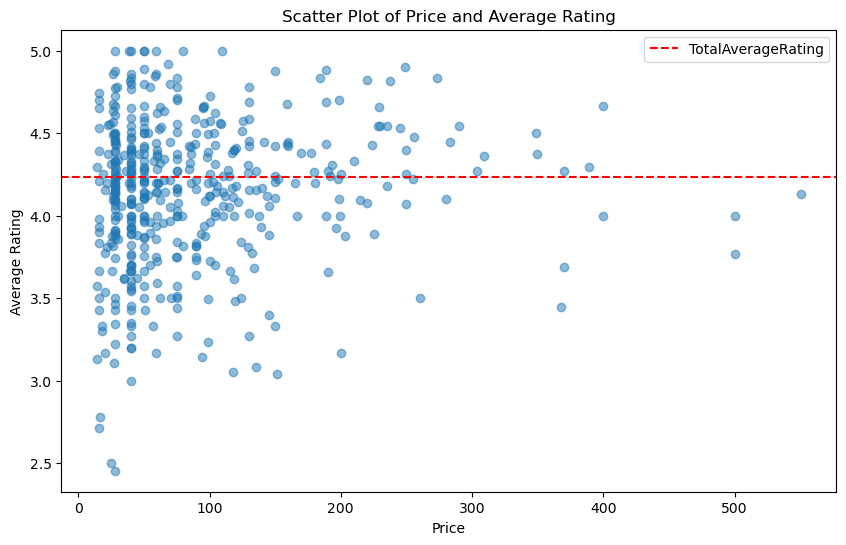

In [26]:
# Σχεδιάζουμε scatter plot τιμής και average rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_clean_no_duplicates['price'], merged_data_clean_no_duplicates['overall_avg'], alpha=0.5)
plt.title('Scatter Plot of Price and Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')

plt.axhline(y=merged_data_clean['overall'].mean(), color='red', linestyle='--', label='TotalAverageRating')

plt.legend()
plt.show()

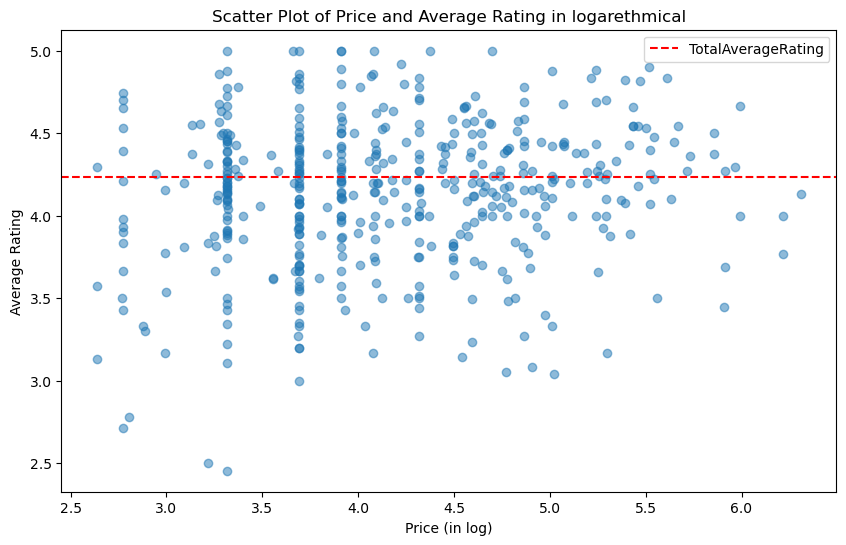

In [27]:
# Σχεδιάζουμε scatter plot τιμής και average rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_clean_no_duplicates['price'].apply(np.log), merged_data_clean_no_duplicates['overall_avg'], alpha=0.5)
plt.title('Scatter Plot of Price and Average Rating in logarethmical')
plt.xlabel('Price (in log)')
plt.ylabel('Average Rating')

plt.axhline(y=merged_data_clean['overall'].mean(), color='red', linestyle='--', label='TotalAverageRating')

plt.legend()

plt.show()

In [28]:
# Υπολογίζουμε τον Pearson Correlation Coefficient και το p-value
correlation_coefficient, p_value = pearsonr(merged_data_clean_no_duplicates['price'].dropna(), merged_data_clean_no_duplicates['overall_avg'].dropna())
print("Pearson Correlation Coefficient: ", correlation_coefficient)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.09686991236023289
P-value:  0.03739763052144097


---
<span style="font-size: 25px;">**Δ**</span>

166600
164320
13541244
13541244
1486140
brand
Samsung          1298
LG                617
Motorola          552
Nokia             509
BLU               456
                 ... 
NONE                1
Oceantree(TM)       1
Coolpad Flo         1
TCL                 1
BEISTE              1
Name: count, Length: 815, dtype: int64
Samsung : 	 4.324817196722756
LG : 	 4.1500569476082
Motorola : 	 4.079979623025981
Nokia : 	 4.236349453978159
BLU : 	 4.173320244328098
['Motorola', 'LG', 'BLU', 'Nokia', 'Samsung']


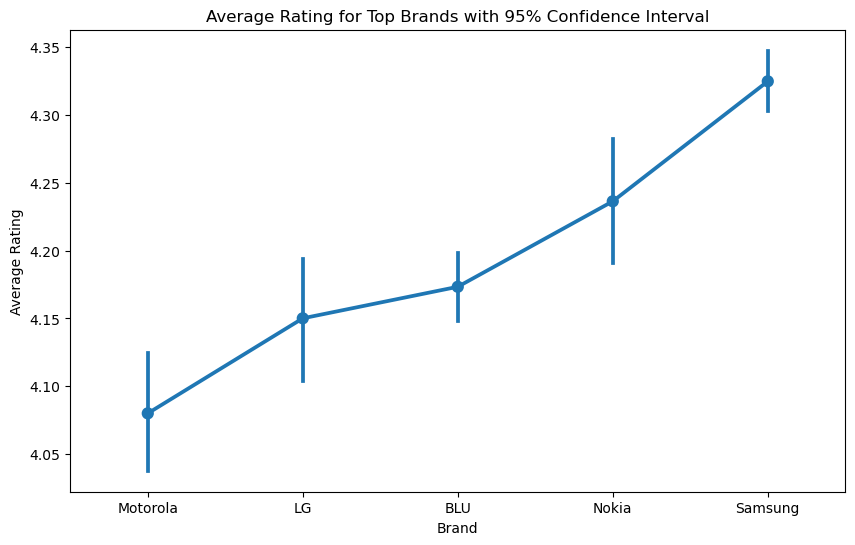

T-test between LG and Samsung: t-statistic=-7.178255432064056, p-value=7.395088320835175e-13
T-test between LG and Motorola: t-statistic=2.223601730444304, p-value=0.02620518220964168
T-test between LG and Nokia: t-statistic=-2.577118234232643, p-value=0.009986160805151119
T-test between Motorola and Samsung: t-statistic=-10.429428488120214, p-value=2.2144074216843224e-25
T-test between Motorola and Nokia: t-statistic=-4.724515943924731, p-value=2.3552235248823895e-06
T-test between Nokia and Samsung: t-statistic=-3.2965002558141347, p-value=0.0009814268838744353
T-test between BLU and Samsung: t-statistic=-8.646407396357482, p-value=5.698518590614585e-18
T-test between BLU and LG: t-statistic=0.9091201105221786, p-value=0.3633040100595508
T-test between BLU and Motorola: t-statistic=3.7742894685634214, p-value=0.00016117258607536793
T-test between BLU and Nokia: t-statistic=-2.2518857314770506, p-value=0.024347913766846908


In [29]:
# Αφαίρεση γραμμών που έχουν ίδια 'asin'(προιόντα) και κρατάμε ενδυκτικά μία γραμμή για να έχουμε την συσχέτιση asin-brand
# Αφαίρεση γραμμών με NaN τιμές από την στήλη 'brand'
print(df_csv.size)
df_csv_cleaned = df_csv.drop_duplicates(subset='asin', keep='first').dropna(subset=['brand'])
print(df_csv_cleaned.size)

# Αφαίρεση γραμμών με NaN τιμές από την στήλη 'overall' (σε περίπτωση που υπάρχουν)
print(df_json.size)
df_json_cleaned = df_json.dropna(subset=['overall'])
print(df_json_cleaned.size)

merged_data = pd.merge(df_csv_cleaned, df_json_cleaned, on='asin', how='inner')
print(merged_data.size)

# Υπολογισμός αριθμού προϊόντων ανά μάρκα
# ΠΡΟΣΟΧΗ έχουν μετρηθεί τα αντικείμενα από το 'df_csv_cleaned'
#γιατί εκεί έχει γίνει μία ωραία αντιστοιχεία με asin - brand
#                                            προιόν_1 - Μάρκα_1
#                                            προιόν_2 - Μάρκα_1
#                                            προιόν_3 - Μάρκα_2
#                                                 ... - ...
product_counts = df_csv_cleaned['brand'].value_counts()
print(product_counts)

# Κρατήστε τις πέντε μάρκες με τα περισσότερα προϊόντα
top_brands = product_counts.head(5).index

# Υπολογισμός average rating ανά μάρκα
average_ratings_by_brand = merged_data.groupby('brand')['overall'].mean()
brand_rating_order = []
for i in top_brands:
    brand_rating_order.append(average_ratings_by_brand.loc[i])
    print(i,": \t", average_ratings_by_brand.loc[i])

# Φιλτράρισμα δεδομένων μόνο για τις top_brands
filtered_data = merged_data[merged_data['brand'].isin(top_brands)]

# Ταξινομούμε κατα αύξουσα σειρά τους κατασκεβαστές με βάση τον average_rating
brand_rating_order = sorted(brand_rating_order)
brand_order = []
for i in brand_rating_order:
    x = average_ratings_by_brand.loc[average_ratings_by_brand == i]
    brand_order.append(x.index.tolist()[0])

print(brand_order)

# Point plot με 95% confidence interval
plt.figure(figsize=(10, 6))
sns.pointplot(x='brand', y='overall', data=filtered_data, errorbar=('ci', 95), order=brand_order)
plt.title('Average Rating for Top Brands with 95% Confidence Interval')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

# T-test για σύγκριση μέσων τιμών μεταξύ διαφορετικών brands
for brand1 in top_brands:
    for brand2 in top_brands:
        if brand1 < brand2:
            data_brand1 = filtered_data[filtered_data['brand'] == brand1]['overall']
            data_brand2 = filtered_data[filtered_data['brand'] == brand2]['overall']
            t_stat, p_value = ttest_ind(data_brand1, data_brand2)
            print(f"T-test between {brand1} and {brand2}: t-statistic={t_stat}, p-value={p_value}")

Παρατήρηση
---
Ξεχωρίζουμε μία αρέσκια σε κάποιες "μάρκες" από τους αγωραστές,</br>
δηλαδή βλέπουμε ότι η `Samsung` *(δεξιά στο γράφημά μας)* έχει τα καλύτερα "ratings"</br>
σε αντίθεση με την `Motorola` *(αριστερά στο γράφημά μας)* που έχει χειρότερα.

---
<span style="font-size: 25px;">**Ε**</span>

C:\Users\spiro\AppData\Local\Temp\ipykernel_17908\2512892259.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json_cleaned['vote'] = df_json_cleaned['vote'].apply(clean_vote)
C:\Users\spiro\AppData\Local\Temp\ipykernel_17908\2512892259.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json_cleaned['reviewLength'] = df_json_cleaned['reviewText'].str.len()
C:\Users\spiro\AppData\Local\Temp\ipykernel_17908\2512892259.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

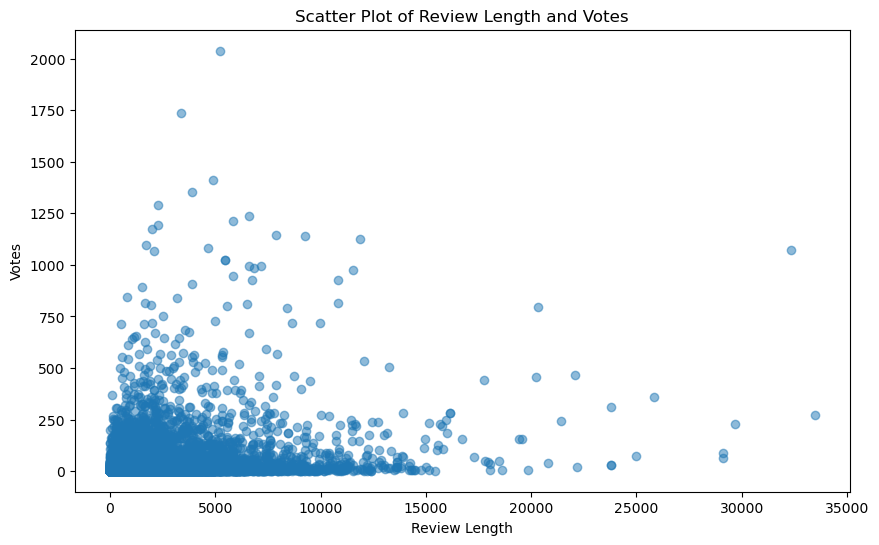

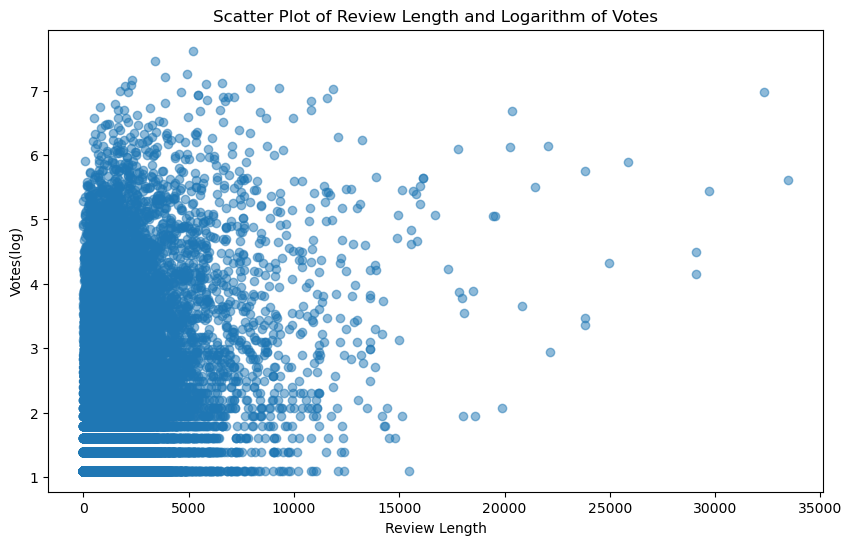

Pearson Correlation Coefficient:  0.32804583343403493


In [30]:
# Αφαιρούμε τις NaN τιμές
df_json_cleaned = df_json.dropna(subset=['vote'])

# Ανανεώνουμε τις τιμές του "vote" γιατί είναι σε String μορφή και μερικοί αριθμοί έχουν το ','
def clean_vote(vote):
    try:
        return int(vote.replace(',', ''))
    except:
        return None
df_json_cleaned['vote'] = df_json_cleaned['vote'].apply(clean_vote)

# Υπολογισμός μήκους του review
df_json_cleaned['reviewLength'] = df_json_cleaned['reviewText'].str.len()

# Υπολογισμός λογαρίθμου των ψήφων
df_json_cleaned['vote_log'] = np.log1p(df_json_cleaned['vote'])

# Scatter plot review length - Vote
plt.figure(figsize=(10, 6))
plt.scatter(df_json_cleaned['reviewLength'], df_json_cleaned['vote'], alpha=0.5)
plt.title('Scatter Plot of Review Length and Votes')
plt.xlabel('Review Length')
plt.ylabel('Votes')
plt.show()

# Scatter plot review length - vote_log
plt.figure(figsize=(10, 6))
plt.scatter(df_json_cleaned['reviewLength'], df_json_cleaned['vote_log'], alpha=0.5)
plt.title('Scatter Plot of Review Length and Logarithm of Votes')
plt.xlabel('Review Length')
plt.ylabel('Votes(log)')
plt.show()

# Υπολογισμός Pearson Correlation Coefficient
correlation_coefficient = df_json_cleaned['reviewLength'].corr(df_json_cleaned['vote_log'])
print("Pearson Correlation Coefficient: ",correlation_coefficient)

C:\Users\spiro\AppData\Local\Temp\ipykernel_17908\100835277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json_cleaned['vote_filter'] = df_json_cleaned['vote'] < 250


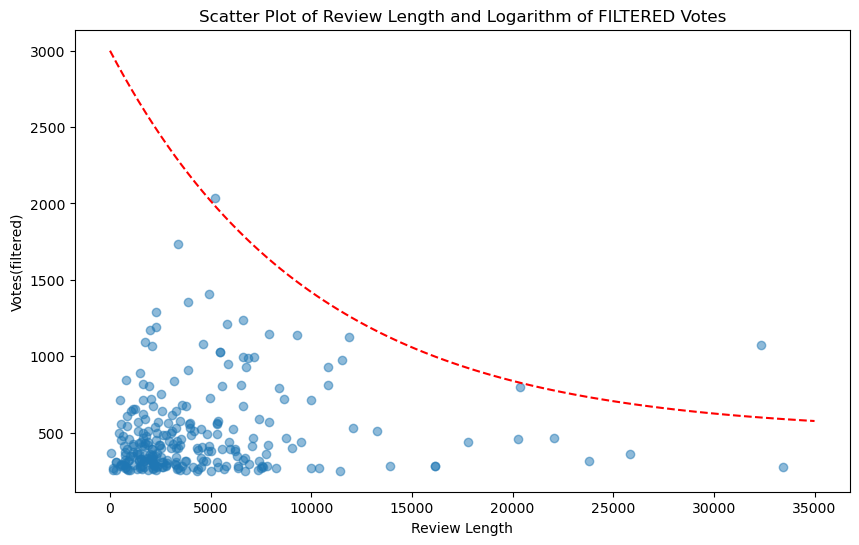

In [31]:
# Προσθέτουμε μια ακόμα στήλη στο df μας για να βγαζει true στις τιμες που θέλουμε να κόψουμε
# αλλάζοντας τον αριθμό μπορούμε να ψαλιδίσουμε σε διαφορετικά ύψη τα δεδομένα μας
df_json_cleaned['vote_filter'] = df_json_cleaned['vote'] < 250

# Φτιάχνουμε ένα καινούργιο φιλτραρισμένο df
df_json_cleaned_vote_filtered = df_json_cleaned[df_json_cleaned['vote_filter'] == False].copy()

plt.figure(figsize=(10, 6))

# Define the exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x) + 500

# Generate x values
x_values = np.linspace(0, 35000, 100)

# Parameters for the exponential decay
a = 2500  # Initial value
b = 0.0001  # Decay rate

# Calculate y values using the exponential decay function
y_values = exponential_decay(x_values, a, b)


plt.scatter(df_json_cleaned_vote_filtered['reviewLength'], df_json_cleaned_vote_filtered['vote'], alpha=0.5)
# Plot the exponential decay line
plt.plot(x_values, y_values, color='red', linestyle='--', label='Exponential Decay')

plt.title('Scatter Plot of Review Length and Logarithm of FILTERED Votes')
plt.xlabel('Review Length')
plt.ylabel('Votes(filtered)')
plt.show()

Παρατήρηση
---
Βλέποντας ειδικά το τελευταίο γράφημα, παρατηρούμε ότι τελικά όσο μεγαλύτερα σε μέγεθος είναι τα reviwes, δεν σημαίνει ότι είναι το ίδιο βοηθητικά τα αντίστοιχα reviews.
*Το παραπάνω γράφημα είναι μία συνέχεια των αρχικών γαρφιμάτων. Απλά έχουν κοπεί οι χαμηλές τιμές των votes & επίσης έχει προστεθεί μία φθίνουσα εκθετική καμπύλη για την καλύτερη οπτικοποίηση.*

---
<span style="font-size: 25px;">**Ζ**</span>

In [32]:
print(df_csv.columns)
print(df_json.columns)

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes',
       'last_category'],
      dtype='object')
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


13541244
13541244

Average Rating for Verified Purchases: 4.206647463244082
Average Rating for Non-Verified Purchases: 4.324484632882867

T-Statistic: -33.627354199258924
P-Value: 8.874816694350387e-248


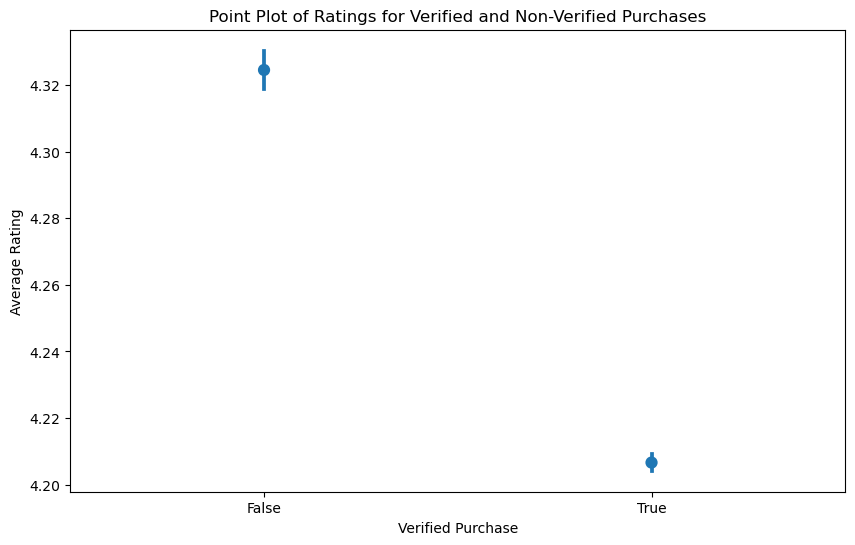

In [33]:
# Αφαιρούμε τις NaN τιμές
print(df_json.size)
df_json_cleaned = df_json.dropna(subset=['verified', 'overall', 'asin'])
#df_json_cleaned = df_json.drop_duplicates(subset=['reviewerID', 'asin', 'verified'], keep='first').dropna(subset=['verified', 'overall', 'asin'])
print(df_json_cleaned.size)

# Διαχωρισμός των δεδομένων μας σε: επιβεβαιωμένες αγορές και μη επιβεβαιωμένες αγορές
df_verified_purchases = df_json_cleaned[df_json_cleaned['verified'] == True]
df_non_verified_purchases = df_json_cleaned[df_json_cleaned['verified'] == False]
print()

# Υπολογισμός μέσων όρων για κάθε ομάδα
avg_rating_verified = df_verified_purchases['overall'].mean()
avg_rating_non_verified = df_non_verified_purchases['overall'].mean()

# Εκτύπωση των μέσων όρων
print(f"Average Rating for Verified Purchases: {avg_rating_verified}")
print(f"Average Rating for Non-Verified Purchases: {avg_rating_non_verified}")
print()

# Εκτέλεση t-test για τη σύγκριση των δύο ομάδων
t_statistic, p_value = ttest_ind(df_verified_purchases['overall'], df_non_verified_purchases['overall'])
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Δημιουργία point plot με confidence intervals
plt.figure(figsize=(10, 6))
sns.pointplot(x='verified', y='overall', data=df_json_cleaned, errorbar=('ci', 95), join=False)
plt.title('Point Plot of Ratings for Verified and Non-Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.show()

Παρατήρηση
---
Βλέποντας γράφημα, παρατηρούμε ότι η διαφορά του Μ.Ο. μεταξύ επιβεβαιωμένων και μη αγορών είναι αρκετά μικρή και το παράδοξο είναι ότι τελικά οι μη-επιβεβαιωμένες αγορές έχουν λίγο καλύτερα raitings.

---
<span style="font-size: 25px;">**Η**</span>

<span style="font-size: 16px;">***ΥΠΟΘΕΣΗ 1η:***</span></br>
`Αν με την εξέλιξη του χρόνου 'date' in csv[ημερομηνία δημιουργίας αντικειμένου], τα αντικείμενα γίνονται καλύτερα με βάση τον Μ.Ο. 'overall' in json`

In [34]:
print(df_csv.columns)
print(df_json.columns)

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes',
       'last_category'],
      dtype='object')
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


***Φιλτράρουμε τα δεδομένα που πέρνουμε από το csv αρχείο</br>
Πιο συγκεκριμένα αφαιρούμε τις γραμμές:</br>***
* Με τα ίδια προϊόντα *(asin)*</br>
* Με *NaN* τιμές στην στήλη που περιέχει τις ημερομηνίας κατασκευής του προϊόντος *(date)*</br>

In [35]:
print(df_csv.size)
df_csv_cleaned = df_csv.drop_duplicates(subset='asin', keep='first').dropna(subset=['date'])
print(df_csv_cleaned.size)

166600
3860


***Μετατροπή τις στήλης με τις ημερομηνίες σε αντικείμενα τύπου DateTime object***

In [36]:
print(df_csv_cleaned['date'])

1       October 19, 2014
126     January 18, 2008
160     October 31, 2005
199        April 2, 2004
228     January 27, 2007
              ...       
8090         May 6, 2016
8091         May 6, 2016
8193       June 21, 2018
8196        June 4, 2016
8228        June 7, 2016
Name: date, Length: 193, dtype: object


In [37]:
df_csv_cleaned['date'] = pd.to_datetime(df_csv_cleaned['date'], format='%B %d, %Y')
print(df_csv_cleaned['date'])
print()
print("Minimum Date:", df_csv_cleaned['date'].min())
print("Maximum Date:", df_csv_cleaned['date'].max())

1      2014-10-19
126    2008-01-18
160    2005-10-31
199    2004-04-02
228    2007-01-27
          ...    
8090   2016-05-06
8091   2016-05-06
8193   2018-06-21
8196   2016-06-04
8228   2016-06-07
Name: date, Length: 193, dtype: datetime64[ns]

Minimum Date: 2000-10-02 00:00:00
Maximum Date: 2018-06-21 00:00:00


***Φιλτράρουμε τα δεδομένα που πέρνουμε από το json αρχείο</br>
Πιο συγκεκριμένα αφαιρούμε τις γραμμές:</br>***
* Με *NaN* τιμές στις στήλες που περιέχουν τα ratings *(overall)* και τα id των προϊόντων *(asin)*</br>

<span style="font-size: smaller;">*Δεν είναι πολύ απαραίτητο αυτό από όσο φαίνεται*</span>

In [38]:
print(df_json.size)
df_json_cleaned = df_json.dropna(subset=['overall', 'asin'])
print(df_json_cleaned.size)

13541244
13541244


***Εννώνουμε τα 2 φιλτραρισμένα dataFrames ως προς τα προϊόντα *(asin)****

In [39]:
merged_data = pd.merge(df_csv_cleaned, df_json_cleaned, on='asin', how='inner')
print(merged_data.size)
print(merged_data['asin'])
print(merged_data['date'])
print(merged_data['overall'])

19964
0      B000KJS8CI
1      B000KJS8CI
2      B000KJS8CI
3      B000KJS8CI
4      B000KJS8CI
          ...    
639    B01GQWT4SE
640    B01GQWT4SE
641    B01GQWT4SE
642    B01GQWT4SE
643    B01GQWT4SE
Name: asin, Length: 644, dtype: object
0     2004-04-02
1     2004-04-02
2     2004-04-02
3     2004-04-02
4     2004-04-02
         ...    
639   2016-06-07
640   2016-06-07
641   2016-06-07
642   2016-06-07
643   2016-06-07
Name: date, Length: 644, dtype: datetime64[ns]
0      5
1      2
2      4
3      3
4      2
      ..
639    5
640    3
641    1
642    5
643    5
Name: overall, Length: 644, dtype: int64


In [40]:
# Σβήνουμε τις ημερομηνίες που έχουν λίγο αριθμό γραμμών(δηλ.λίγα reviwes) για να είναι πιο αντικειμενικό
# Αν βάλουμε 0 εννοείτε δεν θα φύγει καμία γραμμή
filtered_df = merged_data.groupby('date').filter(lambda x: len(x) >= 5)
print(filtered_df.size)
mean_ratings = filtered_df.groupby('date')['overall'].mean().reset_index()
print(mean_ratings)
print(type(mean_ratings))

19778
         date   overall
0  2004-04-02  3.222222
1  2007-10-17  4.727273
2  2008-09-06  5.000000
3  2009-04-10  5.000000
4  2009-10-26  1.500000
5  2010-06-24  4.428571
6  2011-08-06  4.202381
7  2012-02-01  4.740741
8  2012-12-05  3.380000
9  2013-01-22  3.977778
10 2013-10-03  3.200000
11 2014-04-17  3.800000
12 2014-08-27  4.600000
13 2014-09-05  4.250000
14 2014-09-27  4.769231
15 2014-10-11  5.000000
16 2014-11-06  4.108696
17 2014-11-11  3.838235
18 2014-12-15  5.000000
19 2014-12-18  2.666667
20 2015-07-16  4.413043
21 2015-09-22  4.500000
22 2015-11-03  3.689655
23 2016-03-14  4.571429
24 2016-04-28  3.000000
25 2016-06-07  4.043478
<class 'pandas.core.frame.DataFrame'>


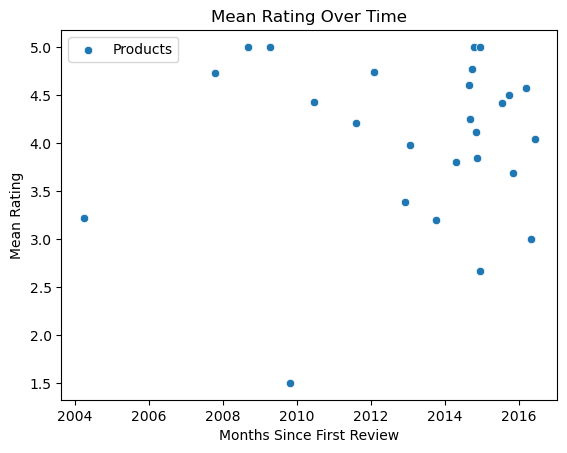

In [41]:
import seaborn as sns
#plt.scatter(df_csv_cleaned['date'], y_data)
sns.scatterplot(x='date', y='overall', data=mean_ratings, label='Products')
plt.title('Mean Rating Over Time')
plt.xlabel('Months Since First Review')
plt.ylabel('Mean Rating')
plt.legend()
plt.show()

Παρατήρηση
---
Παρατηρούμε γενικά αρκετά προιόντα να είναι πάνω δεξιά στο γράφημά μας, που αυτό σημαίνει ότι έχουμε καλές κριτικές όσο προχωράει ο καιρός.</br>
αλλά βλέπουμε και τα παλιότερα έτη ότι δεν έχει μόνο κακές κριτικές, αλλά έχει και αρκετές καλές.</br>
**Άρα μπορούμε να συμπεράνουμε** ότι τελικά δεν μπορούμε να καταλήξουμε με βεβαιότητα στην υπόθεσή μας, ή πιο σωστά δεν μπορούμε να καταλήξουμε σε κάτι τέτοιο, γιατί η βαθμολογία που βάζει ο εκάστοτε reviwer επηρεάζεται και από την ημερομηνία που το βαθμολογεί, που για εκείνη την στιγμή το προϊόν *(τις περισσότερες φορές)* είναι καινούργιο και άρα το βαθμολογεί με βάση τα δεδομένα εκείνης της εποχής.</br>

---
<span style="font-family: 'Times New Roman'; font-size: 16px;">*Επειδή έχουμε καταλήξει με σχετικά λίγα δεδομένα, δεν μπορούμε να προχωρίσουμε αυτήν την ιδέα και να κάνουμε άλλες παρατηρήσεις, επομένως ακολουθεί μία άλλη υπόθεση που θα εξετάσουμε.*</span>

---
<span style="font-size: 16px;">***ΥΠΟΘΕΣΗ 2η:***</span></br>
`Ανάλογα με τα προϊόντα που αγόρασε ο κάθε άνθρωπος('reviewerID'), θέλουμε να δούμε κατά πόσο επηρεάστηκε και τελικά αγόρασε επιπλέον προϊόντα που ανήκουν στην λίστα ('also_view') του αντίστοιχου προϊόντος`

In [42]:
print(df_csv.columns)
print(df_json.columns)

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes',
       'last_category'],
      dtype='object')
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


In [43]:
# για να θυμηθούμε τι έχει το json αρχείο
print(df_json)

         overall  verified   reviewTime      reviewerID        asin  \
0              5      True   08 4, 2014  A24E3SXTC62LJI  7508492919   
1              5      True  02 12, 2014  A269FLZCB4GIPV  7508492919   
2              3      True   02 8, 2014   AB6CHQWHZW4TV  7508492919   
3              2      True   02 4, 2014   A1M117A53LEI8  7508492919   
4              4      True   02 3, 2014  A272DUT8M88ZS8  7508492919   
...          ...       ...          ...             ...         ...   
1128432        4      True  12 22, 2016  A1QWMCG1FNEP3A  B01HJC7N4C   
1128433        5     False  07 15, 2016  A3FOBEJ9UVUTR3  B01HJC7N4C   
1128434        5     False  07 14, 2016   AMUEAMKB4E33M  B01HJC7N4C   
1128435        5     False  07 13, 2016  A2EV91MMOJ3IL4  B01HJC7N4C   
1128436        5      True  05 11, 2017   ARKQD9Z1VPOV2  B01HJH9IN6   

                        style      reviewerName  \
0        {'Color:': ' Bling'}  Claudia Valdivia   
1                         NaN       sarah pon

In [44]:
# για να θυμηθούμε τι έχει το json αρχείο
print(df_csv)

                                               category tech1  \
0     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
1     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
2     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
3     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
4     ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
...                                                 ...   ...   
8325  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8326  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8327  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8328  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   
8329  ['Cell Phones & Accessories', 'Cell Phones', '...   NaN   

                                            description  fit  \
0     ['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...  NaN   
1     ['Standard package: 1 x original phone 1 x Qua...  NaN   
2     ['Dark Blue OEM facep

In [45]:
print(df_json.size)
df_json_cleaned = df_json.dropna(subset=['reviewerID', 'asin'])
print(df_json_cleaned.size)

13541244
13541244


In [46]:
print(df_csv.size)
df_csv_cleaned = df_csv[df_csv['also_view'].apply(lambda x: x != '[]')]
print(df_csv_cleaned.size)

df_csv_cleaned = df_csv_cleaned.drop_duplicates(subset='asin', keep='first')
print(df_csv_cleaned.size)

166600
48440
48420


***Αφαιρούμε από τον κάθε αγοραστή reviewerID τα διπλώτυπα αντικείμενα, γιατί μας ενδιαφέρει κάθε φορά να δούμε ποιά διαφορετικά αντικέιμενα πήρε***</br>
*Παίρνει λίγο χρόνο για να τρέξει ο παρακάτω κώδικας(~0.5 - 1 λεπτό)*

In [47]:
merged_data = pd.merge(df_csv_cleaned, df_json_cleaned, on='asin', how='inner')

grouped_merged_data = merged_data.groupby('reviewerID')

merged_data_cleaned = grouped_merged_data.apply(lambda x: x.drop_duplicates(subset='asin')).reset_index(drop=True)
# μετατρέπω την στήλη 'also_view' από String σε List
merged_data_cleaned['also_view'] = merged_data_cleaned['also_view'].apply(eval)

grouped_merged_data_cleaned = merged_data_cleaned.groupby('reviewerID')

# ένα παράδειγμα αφαίρεσης διπλώτυπων από ένα συγκεκριμένο group
print("With duplicates\n")
print(grouped_merged_data.get_group('A10BWCG99IXBL8')['asin'])
print("-----------------------")
print("Without duplicates(only the 'asin' column)\n")
print(grouped_merged_data_cleaned.get_group('A10BWCG99IXBL8')['asin'])

With duplicates

237    B000VXATLG
246    B000VXATLG
Name: asin, dtype: object
-----------------------
Without duplicates(only the 'asin' column)

91    B000VXATLG
Name: asin, dtype: object


In [48]:
# Εδώ είναι για το πώς θα πάρουμε τον συγκεκριμένο 'reviewerID' για το παρακάτω παράδειγμα
# Βλέπουμε ποιοί reviewersID έχουν διαφορά στον # των γραμμών τους με το grouped_merged_data και το αρχικό μας merged_data με όμως μοναδικά 'asin'
# Τα break έχουν γραφτεί για να βρει μόνο μία περίπτωση
x=0
print("One different ")
for index1, value1 in grouped_merged_data.size().items():
    for index2, value2 in merged_data.groupby('reviewerID')['asin'].nunique().items():
        if index1 == index2:
            if value1 != value2:
                print("reviewerID: ", index1, " - # of rows", value1, " | reviewerID: ", index2, " - # of rows", value2)
                x=1
                break
    if x==1:
        break


One different 
reviewerID:  A10BWCG99IXBL8  - # of rows 2  | reviewerID:  A10BWCG99IXBL8  - # of rows 1


In [49]:
print(merged_data_cleaned['also_view'])
print(merged_data_cleaned['also_view'][1][0])

0                                             [B0749Y4TXV]
1        [B01FS0AAZG, B01MU0YKUB, B00G9CP058, B07JF6L6P...
2        [B00WHE2WCG, B00WHE2WVM, B00X2ZQ5RM, B00U8KT5M...
3        [B00YD5400Y, B00YD53YQU, B00YD543VU, B00YD53XK...
4        [B016QVDGV6, B00YT13T3Q, B06XH4396B, B00OKU5RP...
                               ...                        
32631    [B0747WWP4D, B01M24QYPN, B00GGQJL2K, B01FS0AAZ...
32632    [B01FJT7E0A, B077ZKFB2D, B01FJT7MPW, B00F2GR5R...
32633    [B01N95TNK1, B01MU0YKUB, B071G7RD68, B0749Y4TX...
32634    [B008VUNRZQ, B005ZD6WQS, B004ZLV4JG, B004ZLV4A...
32635    [B072N6BD9V, B0747WWP4D, B01FS0AAZG, B01M24QYP...
Name: also_view, Length: 32636, dtype: object
B01FS0AAZG


In [50]:
for group_name, group_data in grouped_merged_data_cleaned:
    print(f"Group: {group_name}")
    print(group_data['asin'])
    print(group_data['also_view'])
    print("\n")
    break

Group: A0139208HN0ZKQE4E6O3
0    B00PKM1QCO
1    B00PYWQAJY
2    B00U8KSN4M
Name: asin, dtype: object
0                                         [B0749Y4TXV]
1    [B01FS0AAZG, B01MU0YKUB, B00G9CP058, B07JF6L6P...
2    [B00WHE2WCG, B00WHE2WVM, B00X2ZQ5RM, B00U8KT5M...
Name: also_view, dtype: object




Counts:
result_column
False    30609
True      2027
Name: count, dtype: int64


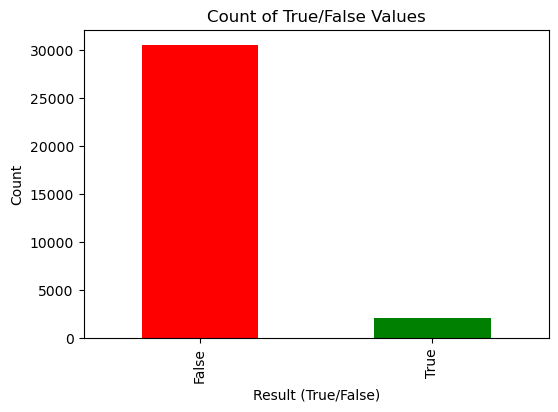

In [51]:
# Check if the element of 'asin' is in the group of lists of 'also_view'
# Υπάρεχει στο τέλος παρακάτω ένα πιο μικρό παράδειγμα με τον ίδιο κώδικα για να φανεί καλύτερα το τι κάνω εδώ
result = grouped_merged_data_cleaned.apply(lambda group: group['asin'].isin([item for sublist in group['also_view'] for item in sublist]))

# Flatten the boolean mask to a single column
result_column = result.reset_index(level=0, drop=True)

# Add the result column to the original DataFrame
merged_data_cleaned['result_column'] = result_column

# Count True and False values
counts = merged_data_cleaned['result_column'].value_counts()

# Display the counts
print("Counts:")
print(counts)

# Plot the counts
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result (True/False)')
plt.ylabel('Count')
plt.title('Count of True/False Values')
plt.show()

---
Από εδώ και πέρα με αυτά τα δεδομένα μπορούμε να κάνουμε αρκετά πράγματα.</br>
</br>
Αλλά τελικά, η υπόθεση που θα εξετάσουμε, θα είναι:</br>
**`Πόσοι από όλους τους αγοραστές έχουν επηρεαστεί, και αγοράζοντας ένα προιόν, καταλήγουν να αγοράζουν και άλλα παρεμφερεί προιόντα.`**

In [52]:
# ο συνολικός αριθμός όλων των διαφορετικών αγοραστών 'reviewerID'
count_dif_reviewerID = grouped_merged_data_cleaned.ngroups
print(count_dif_reviewerID)

19355


In [53]:
# Διαχωρισμός των δεδομένων μας σε 2 DataFrames: False και True
# (ανάλογα με το αν ένα προιον που ανήκει 'asin' είναι σε κάποια από τις λίστες που έχει ο ίδιος ο αγοραστής)
# (δηλαδή αν πρακτικά επηρεάστηκε και το αγόρασε και αυτό)
df_false = merged_data_cleaned[merged_data_cleaned['result_column'] == False]
df_true = merged_data_cleaned[merged_data_cleaned['result_column'] == True]

# Γκρουπάρουμε, μόνο τις σειρές που έβγαζαν True, με βάση τους αγοραστές 'reviewerID'
# Δηλαδή έχουμε όλους τους επιρρεασμένους αγοραστές
grouped_df_true = df_true.groupby('reviewerID')

# Ο αριθμός τον επιρρεασμένων αγοραστών
count_dif_reviewerID_True = grouped_df_true.ngroups
print(count_dif_reviewerID_True)

1212


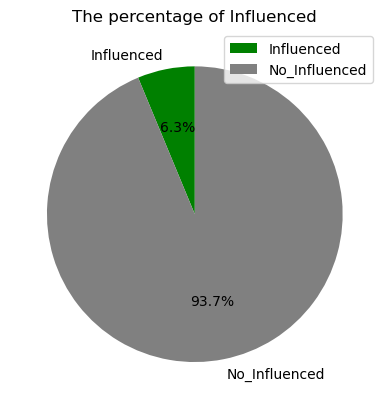

In [54]:
complement_count = count_dif_reviewerID - count_dif_reviewerID_True

sizes = [count_dif_reviewerID_True, complement_count]
labels = ['Influenced', 'No_Influenced']
colors = ['green', 'grey']

# Create a stacked bar chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add legend
plt.legend()

# Add title
plt.title('The percentage of Influenced')

# Display the chart
plt.show()

Παρατήρηση
---
Καταλήγουμε σε ένα σχετικά μικρό ποσοστό, όπου αυτό μας δείχνει ότι δεν επηρεάζονται αρκετά με τα προιόντα.</br>
</br>
<span style="font-family: 'Times New Roman'; font-size: 15px;">*Όμως αξίζει να συμειωθεί ότι τα δεδομένα που έχουμε δεν περιέχουν όλες τις αγορές προϊόντων που έκαναν κάποιοι άνθρωποι, αλλά είναι μόνο reviews που έκαναν σε κάποια προϊόντα που έχουν αγοράσει(δηλαδή έχουμε ένα υποσύνολο), τα αποτελέσματά μας δεν θα είναι αντιπροσωπευτηκά 100% αλλά μας δίνουν μια καλή προσεγγιστική είκονα για το αν και πόσο ο άνθρωπος μπορεί να επηρεαστεί.*</span>

---
*Ένα κομμάτι από τον παραπάνω κώδικα, απλά σε ένα μικρότερο παράδειγμα για την καλύτερη κατανόησή του*

OLD_GROUPED_DF:
Group: A
  column1  column2   column3
0       A       10      [20]
2       A       30  [10, 20]
3       A       40      [20]


Group: B
  column1  column2   column3
1       B       20      [10]
4       B       50  [40, 20]


RESULTS:
column1   
A        0     True
         2    False
         3    False
B        1     True
         4    False
Name: column2, dtype: bool


NEW_GROUPED_DF:
Group: A
  column1  column2   column3  result_column
0       A       10      [20]           True
2       A       30  [10, 20]          False
3       A       40      [20]          False


Group: B
  column1  column2   column3  result_column
1       B       20      [10]           True
4       B       50  [40, 20]          False


Counts:
result_column
False    3
True     2
Name: count, dtype: int64


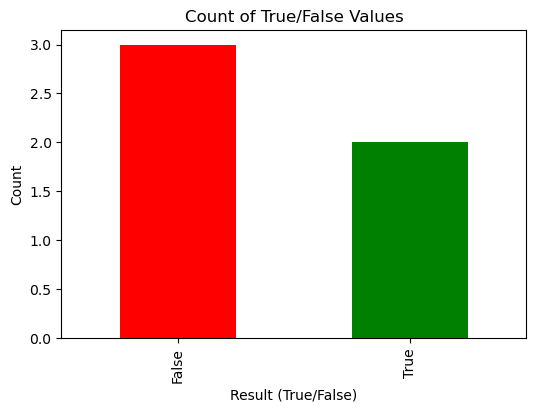

Count of Groups: 2
  column1  column2   column3  result_column
2       A       30  [10, 20]          False
3       A       40      [20]          False
4       B       50  [40, 20]          False
  column1  column2 column3  result_column
0       A       10    [20]           True
1       B       20    [10]           True


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'column1': ['A', 'B', 'A', 'A', 'B'],
        'column2': [10, 20, 30, 40, 50],
        'column3': [[20],[10],[10, 20],[20],[40, 20]]}

df = pd.DataFrame(data)
df_grouped = df.groupby('column1')

# Check if the element of 'column2' is in the group of lists of 'column3'
# δηλαδή στο Group A στην γραμμή όπου το 'column2' είναι 10, θα βγάλει True
# γιατί μέσα στο Group A υπάρχει στην επόμενη γραμμή (σε άλλο αντικέιμενο δηλαδή με 'column2' 30)
# μία λίστα στο 'column3' όπου το 10 ανήκει σε αυτήν την λίστα
result = df_grouped.apply(lambda group: group['column2'].isin([item for sublist in group['column3'] for item in sublist]))


# Display the result
print("OLD_GROUPED_DF:")
for group_name, group_data in df_grouped:
    print(f"Group: {group_name}")
    print(group_data)
    print("\n")   

print("RESULTS:")
print(result)
print("\n")

# Flatten the boolean mask to a single column
result_column = result.reset_index(level=0, drop=True)

# Add the result column to the original DataFrame
df['result_column'] = result_column

print("NEW_GROUPED_DF:")
df_grouped = df.groupby('column1')
for group_name, group_data in df_grouped:
    print(f"Group: {group_name}")
    print(group_data)
    print("\n")

# Count True and False values
counts = df['result_column'].value_counts()

# Display the counts
print("Counts:")
print(counts)

# Plot the counts
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result (True/False)')
plt.ylabel('Count')
plt.title('Count of True/False Values')
plt.show()

num_groups = df_grouped.ngroups
print("Count of Groups:", num_groups)

df_false = df[df['result_column'] == False]
df_true = df[df['result_column'] == True]

print(df_false)
print(df_true)